In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("C:\Archivos\Viz_2022_Grupo_4")


In [183]:
path = "docker\challenge_data"

#data challange
employers = pd.read_csv(path+"\Attributes\Employers.csv")
jobs = pd.read_csv(path+"\Attributes\Jobs.csv")
buildings = pd.read_csv(path+"\Attributes\Buildings.csv")

schools = pd.read_csv(path+"\Attributes\Schools.csv")
pubs = pd.read_csv(path+"\Attributes\Pubs.csv")
restos =pd.read_csv(path+"\Attributes\Restaurants.csv")

financial = pd.read_csv(path+"\Journals\FinancialJournal.csv")
checkin = pd.read_csv(path+"\Journals\CheckinJournal.csv")

# mati tabs
jobs = pd.read_csv("docker/Files/participant_job.csv",
                    delimiter = ";", header=1)
hrs_spent = pd.read_csv("docker/Files/hours_spent_in_venue.csv",
                    delimiter = ";", header=1)
employ = pd.read_csv("docker/Files/employer_employee.csv",
                    delimiter = ";", header=1)

In [184]:
# asigno el tipo de negocio en funcion del building ID
buildings.loc[buildings.buildingId.isin(list(set(pd.unique(restos.buildingId)) )), 
              "businessType"] = "Restaurant"
buildings.loc[buildings.buildingId.isin(list( set(pd.unique(pubs.buildingId)) )),
              "businessType"] = "Pub"
buildings.loc[buildings.buildingId.isin(list(set(pd.unique(schools.buildingId) ))),
              "businessType"] = "School"
buildings.loc[buildings.businessType.isnull(), 
              "businessType"] = "Other"

# buildings[buildings["buildingType"] =="Commercial"]
# buildings[buildings["businessType"] !="Other"]

In [193]:
# creo georeferencacion de los empleadores
employers['location_x'] = employers['location'].map(
    lambda x: x.lstrip('POINT (').rstrip(')')).str.split(' ').str[0].astype(float)

employers['location_y'] = employers['location'].map(
    lambda x: x.lstrip('POINT (').rstrip(')')).str.split(' ').str[1].astype(float)


employers_join = pd.merge(employ[["employerid", "count"]],  employers,
                          how = "right", 
                          left_on = "employerid" , right_on = "employerId").drop("employerid",1) #join empleadores y cant empleados
employers_join = pd.merge(employers_join, buildings[["buildingId", "buildingType", "businessType"]], 
                          how = "left", left_on = "buildingId", right_on = "buildingId") # join con edificios
employers_join.head()

C:\Users\mateo\AppData\Local\Temp/ipykernel_11924/824357148.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  employers_join = pd.merge(employ[["employerid", "count"]],  employers,


,count,employerId,location,buildingId,location_x,location_y,buildingType,businessType
0,1,379,POINT (-1849.997168394888 1744.6010147106394),823,-1849.997168,1744.601015,Commercial,Other
1,0,380,POINT (41.51783767879146 418.7264799744545),154,41.517838,418.726480,Commercial,Other
2,4,381,POINT (877.2786575380362 1358.5441805909259),279,877.278658,1358.544181,Commercial,Other
3,4,382,POINT (670.3987400004884 1584.4743462106067),3,670.398740,1584.474346,Commercial,Other
4,6,383,POINT (829.9556783260775 2163.4803049897623),146,829.955678,2163.480305,Commercial,Other


In [194]:
employers_join["businessType"].value_counts() #no hay escuelas como empleadores

Other         225
Restaurant     17
Pub            11
Name: businessType, dtype: int64

C:\Users\mateo\AppData\Local\Temp/ipykernel_11924/1599917057.py:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(scatter.legend_elements() , labels = list(colors.keys() ) )


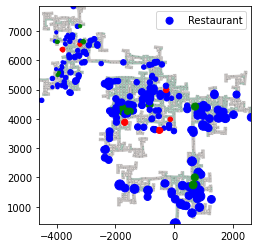

In [206]:
size = employ["count"].to_numpy()
s = [10*s for s in size]

colors = {"Restaurant": "green", "Pub": "red", "School": "yellow", "Other": "blue"}


fig, ax = plt.subplots()
img = plt.imread("data/BaseMap.png")
ax.imshow(img, extent= [employers.location_x.min(),
                        employers.location_x.max() ,
                        employers.location_y.min() ,
                        employers.location_y.max() ] )
scatter = ax.scatter(employers.location_x, employers.location_y , s = s, 
          c = employers_join["businessType"].map(colors) ) 
ax.legend(scatter.legend_elements() , labels = list(colors.keys() ) ) # legend probleemmm

In [124]:
pd.unique(buildings.buildingType)

array(['Commercial', 'Residental', 'School'], dtype=object)

## Reviso si venuiId coincide con Id de restaurante, pub y school

In [35]:
pd.unique(checkin.venueType)

array(['Pub', 'Restaurant', 'Apartment', 'Workplace'], dtype=object)

In [31]:
set_checks = set(pd.unique(checkin.venueId) )

set_restos = set(pd.unique(restos.restaurantId) )
set_pubs = set(pd.unique(pubs.pubId) )
set_schools = set(pd.unique(schools.schoolId) )


print(len(set_checks) )


1114


In [43]:
cum_largo_sets = 0
cum_largo_inter = 0

for i in [set_restos, set_pubs, set_schools]:
    largo_sets = len(i)
    cum_largo_sets+= largo_sets
    
    largo_inter = len(set_checks.intersection(i ) )
    cum_largo_inter += largo_inter
    print(largo_inter)

print()
print(cum_largo_sets)
print(cum_largo_inter)

20
12
1

36
33
